# Project: TMDb Movie Data

## Table of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Exploratory Data Analysis](#exploration)
- Conclusions:
    - [Conclusion 1](#conclusion1)
    - [Conclusion 2](#conclusion2)
    - [Conclusion 3](#conclusion3)
    - [Conclusion 4-budget](#conclusion4_budget)
    - [Conclusion 4-directors](#conclusion5_director)
- [Final Thoughts](#final_thoughts)


<a id='intro'></a>
## Introduction

> This dataset comes from The Movie Database (TMDb) where a variety of details have been documented about roughly 11,000 movies spanning from 1960 to 2015.
> 
> Some of the information includes: popularity, budget, revenue, cast, director, genre, release date, runtime, and more.
>  
### Questions to Explore:
- Which release quarters result in greater ROI?
- Which genres result in the greatest ROI from year to year?
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high ROIs?

In [17]:
import os
os.getcwd()
os.listdir(".")

['.DS_Store',
 'investigate_tmbd_movies_original.ipynb',
 'investigate_tmbd_movies.ipynb',
 '.ipynb_checkpoints',
 'tmdb-movies.csv',
 'investigate_tmbd_movies.ipynb.zip']

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [19]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df.shape

(10866, 21)

In [21]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [22]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Initial Observations:
- Max popularity is much higher than the 75th percentile popularity. Need to deal with this later.
- Budget of 0 is strange, but not completely unexpected. A revenue of 0 is strange and unexpected. Will deal with them when I make a ROI column/filter.
- A runtime of 0 doesn't make sense. Should remove these movies.
- Looks as though there is one duplicate movie based on the unique number of imdb_ids.
- There are many non-unique imdb_ids. Will look into this to see if they are missing or potentially duplicate movies.
- There are many non-unique original_titles. Will look into this to see if they are just remakes or potentially duplicate movies.

In [24]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [25]:
# Investigating movies with non-unique imdb_id.
df[df['imdb_id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


##### None of these movies are duplicates of eachother. They are just missing their imdb-id. There is no further action that needs to be taken.

In [26]:
# Investigating movies with non-unique original titles.
df[df['original_title'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


In [27]:
# Looking into a few of the movies with the same original title to ensure they are not duplicates.
df[df['original_title'] == 'Survivor'];
df[df['original_title'] == 'Finders Keepers'];
df[df['original_title'] == 'Julia'];

##### Looking more closely into the first three 'original_title' duplicates, it seems that these movies are just remakes of eachother.
##### Also, there was only one duplicate that python had found in this dataset and the plan is to remove that, so this finding is not surprising.

In [28]:
# Looking into the structure of the popularity scores.
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [29]:
# Looking into outliers in popularity column.
a = np.arange(0.75,1,0.01)
df['popularity'].quantile(a)

0.75    0.713817
0.76    0.738994
0.77    0.764821
0.78    0.789536
0.79    0.823152
0.80    0.861368
0.81    0.893932
0.82    0.925758
0.83    0.966913
0.84    1.006894
0.85    1.048852
0.86    1.095869
0.87    1.144564
0.88    1.210564
0.89    1.280358
0.90    1.350654
0.91    1.441668
0.92    1.559696
0.93    1.689481
0.94    1.846705
0.95    2.046602
0.96    2.315075
0.97    2.643517
0.98    3.203822
0.99    4.581144
Name: popularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

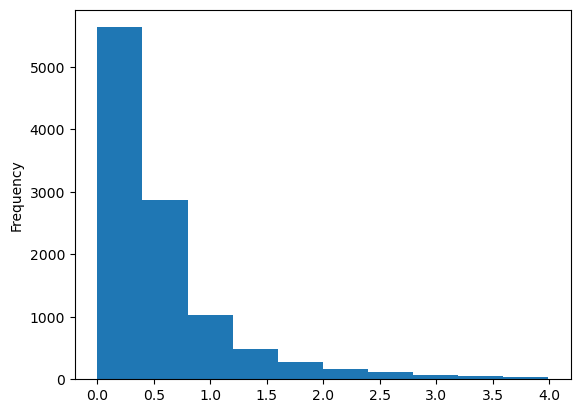

In [30]:
df['popularity'][df['popularity'] <= 4].plot(kind = 'hist')

#### When cleaning the data, the plan is to create a popularity function to only use popularities up to the 95th percentile.

### Data Cleaning

In [31]:
# Creating a get_quarter function to map each release month to release quarter.
# Since release month will be created from the release_date column (which is coded as a string -- not datetime),
#   I need to convert each release_month entry from a string to an int.
def get_quarter(x):
    if int(x) in (1, 3):
        return 1
    elif int(x) in (4, 6):
        return 2
    elif int(x) in (7, 9):
        return 3
    else:
        return 4
    

In [32]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

def clean_data_frame(df):
   clean_df = df.copy()
   clean_df.drop_duplicates(inplace = True) # Removing duplicated TEKKEN movie.
   clean_df['genres'].fillna("Missing Genre", inplace=True) # Fill NAs with sensible value to avoid breaking of functions
   clean_df['main_genre'] = clean_df["genres"].apply(lambda x: x.split('|')[0]) # Creating main_genre column based on first entry in genres column.
   clean_df['profit'] = clean_df['revenue'] - clean_df['budget'] # Creating profit column
   clean_df['ROI'] = clean_df['profit']/clean_df['budget'] # Creating return on investment column to see just how profitable movie was in terms of proportions.
   clean_df.query('runtime != 0', inplace = True) #Keeping rows that contains a runtime of not 0
   clean_df['release_month'] = clean_df["release_date"].apply(lambda x: x.split('/')[0])#clean_df['release_date'].dt.month.astype(str)
   clean_df['release_quarter'] = clean_df.apply(lambda row: get_quarter(row['release_month']), axis=1)
   return clean_df
   

In [33]:
clean_df = clean_data_frame(df)

In [34]:
clean_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,profit,ROI,release_month,release_quarter
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1363528810,9.090192,6,2
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,228436354,1.522909,5,4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,185238201,1.683984,3,1
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,1868178225,9.340891,12,4
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,1316249360,6.927628,4,2


In [35]:
# will be using this later on when I explore relationships with popularities
def usable_popularities(df, outlier_quantile):
    #return popularities that are less than the outlier_quantile
    mask = df['popularity'] <= df['popularity'].quantile(outlier_quantile)
    #returns rows in df where mask was true
    return df[mask]

In [36]:
# will be using this later on when I explore relationships with ROIs
def ROI_filter(df, lower_threshold = None, upper_threshold = None):
    # return ROIs greater than or equal to threshold & less than or equal to upper_threshold
    filtered = df.copy()
    if (lower_threshold is None) & (upper_threshold is None):
        raise ValueError("At least one of lower_threshold or upper_threshold should not be None")
    if lower_threshold is not None:
        filtered = filtered[filtered["ROI"] >= float(lower_threshold)]
    if upper_threshold is not None:
        filtered = filtered[filtered["ROI"] <= float(upper_threshold)]
    return filtered

<a id='exploration'></a>
<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which release quarters result in greater ROI?

In [37]:
# filtering clean_df for ROIs from 0 to 10 (break-even to 10x profit)
filtered_ROI = ROI_filter(clean_df, 0, 10);



In [38]:
# create df with release_year, release quarter & ROI
keep_cols = ['release_year', 'release_quarter','ROI']
# calculate mean ROI for each quarter in each year
ROI_quarters_overtime = filtered_ROI[keep_cols].groupby(['release_year', 'release_quarter']).mean('ROI')

In [39]:
# creating moving average column for mean ROIs
# using moving average over last 5 years (20 months)
ROI_quarters_overtime['MA'] = ROI_quarters_overtime['ROI'].rolling(20).mean()
ROI_quarters_overtime

ROI        MA
release_year release_quarter                    
1960         2                7.333333       NaN
             4                2.273056       NaN
1961         2                3.816667       NaN
             4                3.334619       NaN
1962         2                1.500000       NaN
...                                ...       ...
2014         4                2.787778  2.445739
2015         1                2.166904  2.468390
             2                3.406105  2.506433
             3                2.585262  2.493041
             4                2.541515  2.524368

[197 rows x 2 columns]

Text(0, 0.5, 'Moving Avg of Quarterly ROIs')

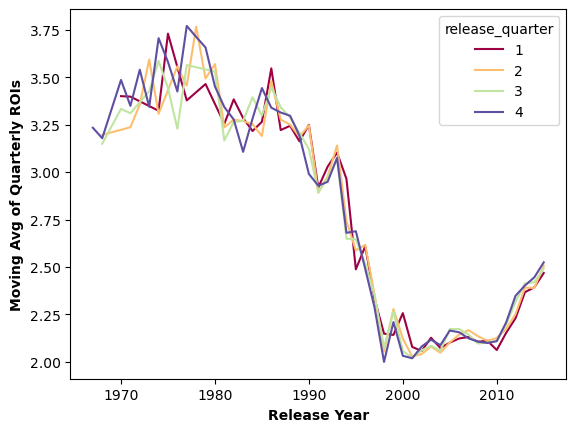

In [40]:
sns.lineplot(x=ROI_quarters_overtime.index.get_level_values("release_year"), y = ROI_quarters_overtime.MA, hue=ROI_quarters_overtime.index.get_level_values("release_quarter"), palette = 'Spectral')
plt.xlabel('Release Year', weight='bold')
plt.ylabel('Moving Avg of Quarterly ROIs', weight='bold')

> WHOA! There has been a huge decline in avg ROI overtime.
> This could be interesting to dig into. It could be due to an influx on alternative entertainment options to movies.
>
> For now, the plan is to only look at data from 1999 and forward, where the avg quarterly ROIs starting turning around.

Text(0, 0.5, 'Moving Avg of Quarterly ROIs')

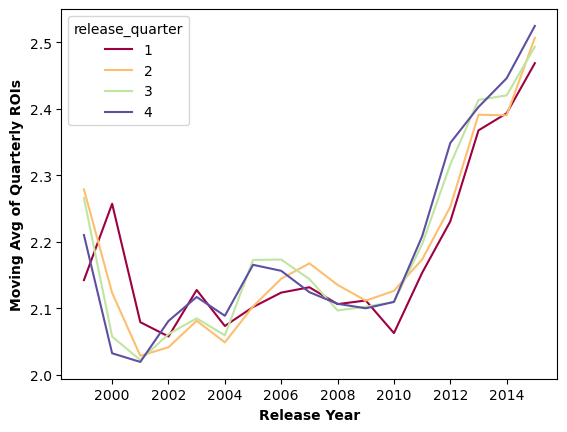

In [41]:
ROI_quarters_overtime = ROI_quarters_overtime.query('release_year >= 1999')
# plotting each year's ranking of avg ROI by quarter since 2000
sns.lineplot(x=ROI_quarters_overtime.index.get_level_values("release_year"), y = ROI_quarters_overtime.MA, hue=ROI_quarters_overtime.index.get_level_values("release_quarter"), palette = 'Spectral')
plt.xlabel('Release Year', weight='bold')
plt.ylabel('Moving Avg of Quarterly ROIs', weight='bold')

<a id='conclusion1'></a>
### Conclusion 1:
Since 2010 looks as though releasing a movie in Quarter 3 and 4 (July - December) have consistently been producing the highest quarterly ROI on average.
Quarters 1 and 2 are following the same trend. However, Quarter 1 has been consistently the lowest producing quarterly ROI on average since 2010.

Pretending we're back in 2015, and I had to suggest the best time to release a movie, I would suggest Quarter 4.
The movie might not produce a high ROI, but I would think it would still do better than if it were to get released in Quarter 1.

### Research Question 2:  Which genres result in the greatest ROI from year to year?

> Exploration Technique: Get top ROI genre for each year. Then plot bar chart with counts for each top ROI genre. 

> Extra goals: 1) Put years in which each top ROI genre occured at the top of individual counts. 2) Add color gradient to show change in years (helpful to see years closer to 1960 vs 2015.

In [42]:
# create df with release_year, main_genre & ROI
keep_cols_genre = ['release_year', 'main_genre','ROI']
# calculate mean ROI for each month in each year
ROI_genres_overtime = filtered_ROI[keep_cols_genre].groupby(['release_year', 'main_genre']).mean('ROI')
# add ROI rank column
ROI_genres_overtime['rank'] = ROI_genres_overtime.groupby('release_year')['ROI'].rank(method="average", ascending = False)

In [43]:
# keep only rows with a rank of 1
ROI_top_genre_overtime= ROI_genres_overtime.query('rank <= 1')
ROI_top_genre_overtime

,,ROI,rank
release_year,main_genre,,
1960,Comedy,4.350000,1.0
1961,Horror,9.000000,1.0
1962,Crime,5.564923,1.0
1963,Horror,3.561412,1.0
1964,Drama,3.493297,1.0
1965,Drama,6.980136,1.0
1966,Drama,3.498225,1.0
1967,Music,9.000000,1.0
1968,Horror,9.436071,1.0


In [44]:
# Use release year and genre as dataframe alone
cols = ["release_year", "main_genre"]
genres_of_interest = ROI_top_genre_overtime.reset_index()[cols]
grouped = genres_of_interest.groupby("main_genre").size().sort_values(ascending=False)


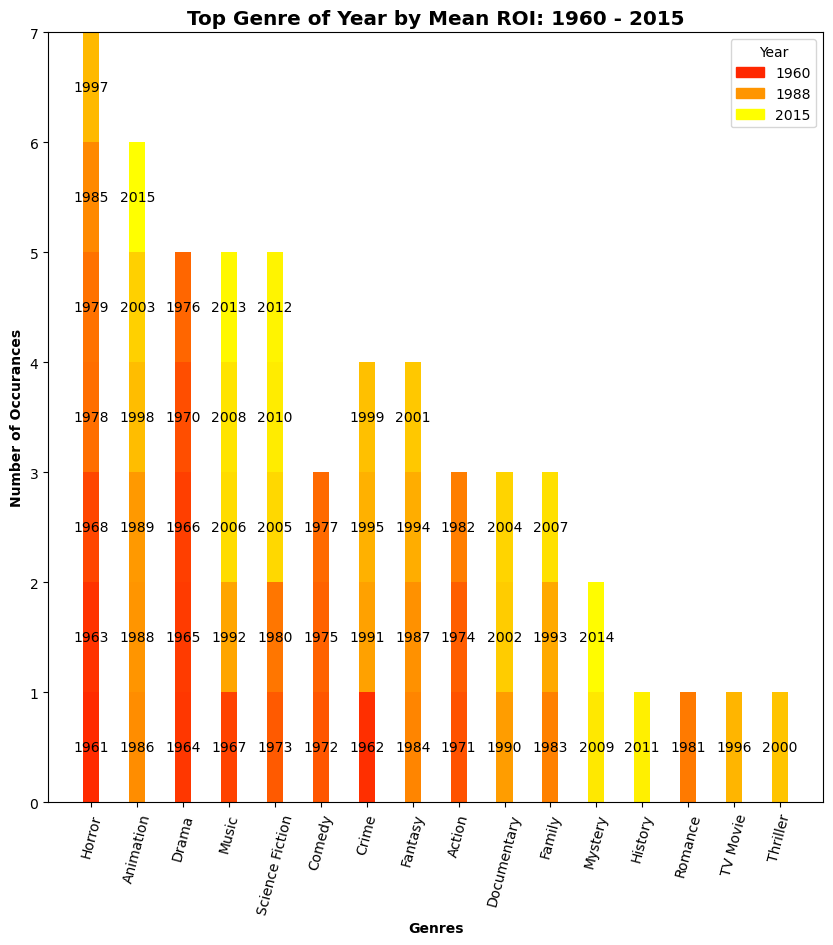

In [45]:
# 1. Get genres in the order of highest frequency to lowest
# 2. For each year in years, do the following:
#       a. For each genre in genres, if genre is present that year, count is 1 else 0
#       b. For each genre in genres, if genre is present that year, label is str(year), else ""
# 3. To get better coloring, we will create a sequence of gradient colors.. one color for
#    each value in years.. we will set the color to color[i] as we iteratively build plot

ordered_genre_list = list(grouped.index.values)
years = genres_of_interest.release_year.sort_values().unique()
cmap = matplotlib.cm.get_cmap("autumn") # copper, Blues
norm = matplotlib.colors.Normalize(vmin=years.min()-10, vmax=years.max())
colors = [cmap(norm(year)) for year in years]

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
i = 0
previous_data = np.zeros(len(ordered_genre_list))
for year in years:
    genres = []
    counts = []
    labels = []

    # Get top genre of year
    query_result = genres_of_interest.query("release_year == @year").reset_index()["main_genre"][0]
    
    # build info for plot row
    for genre in ordered_genre_list:
        genres.append(genre)
        if genre == query_result:
            counts.append(1)
            labels.append(str(year))
        else:
            counts.append(0)
            labels.append(" ")

    # plot
    if i == 0:
        p1 = ax.bar(ordered_genre_list, counts, width=.35, color=colors[i])
        i += 1
    else:
        p1 = ax.bar(ordered_genre_list, counts, width=.35, bottom=previous_data, color=colors[i])
        ax.bar_label(p1, labels=labels, label_type='center')
        previous_data += np.array(counts)
        i+=1

plt.xticks(rotation=75);
plt.xlabel('Genres', weight = 'bold', fontsize = 'medium')
plt.ylabel('Number of Occurances', weight = 'bold', fontsize = 'medium')
plt.title('Top Genre of Year by Mean ROI: 1960 - 2015', weight = 'bold', fontsize = 'x-large')

yellow_patch = mpatches.Patch(color=cmap(norm(2015)), label='2015')
orange_patch = mpatches.Patch(color=cmap(norm(1988)), label = '1988')
red_patch = mpatches.Patch(color=cmap(norm(1960)), label='1960')
plt.legend(handles = [red_patch, orange_patch, yellow_patch], title='Year');

### Thoughts:

Historically, Horror had been topping the charts with a high return on investment. However, it hasn't been a top preforming genre since 1997. 
If we look towards the more "yellow bars", i.e. the more recent years, it looks like Music, Science Fiction, and Mystery have been performing at top in terms on ROI.

Just to get a better insight to these genres, lets take a quick look at their 5-number summaries.


In [46]:
# creating df to filter budgets so they are greater than 0,
#   allow for an ROI cap (there are movies with outlier ROIs - makes it difficult to analyze), &
#   provide descriptive statistics for each genre's ROI
def ROI_by_genre(df, ROI_cap=None):
    positive_budget_mask = df.budget > 0
    if ROI_cap:
        ROI_mask = df.ROI <= ROI_cap
        return df[positive_budget_mask & ROI_mask].groupby('main_genre')['ROI'].describe()
    return df[positive_budget_mask].groupby('main_genre')['ROI'].describe()

In [47]:
# create df with descriptive statistics for each genre's ROI
#   capping ROI at 50x profit, and
#   sorting values based on the median, with a second sort on the IQR
roi_by_genre_df = ROI_by_genre(clean_df, 50).sort_values(by='50%', ascending=False)
roi_by_genre_df['IQR'] = roi_by_genre_df["75%"] - roi_by_genre_df["25%"]
roi_by_genre_df.sort_values(by=["50%", "IQR"], ascending=False)

,count,mean,std,min,25%,50%,75%,max,IQR
main_genre,,,,,,,,,
Adventure,358.0,2.087377,4.314379,-1.0,-0.497701,0.891820,2.746716,34.685714,3.244417
Science Fiction,117.0,2.177949,4.691300,-1.0,-0.811606,0.875716,2.989247,29.000000,3.800853
Animation,142.0,1.529221,3.086259,-1.0,-1.000000,0.812223,2.816844,17.001794,3.816844
Family,50.0,2.297755,4.149115,-1.0,-0.514834,0.730447,2.918200,16.516484,3.433033
Romance,83.0,2.559831,5.783341,-1.0,-0.932408,0.619699,2.449547,32.071429,3.381956
History,22.0,2.884172,5.343793,-1.0,-0.873239,0.581196,2.306727,16.051482,3.179966
Fantasy,138.0,1.353139,3.092600,-1.0,-0.921317,0.532398,2.055313,21.954545,2.976631
Comedy,1023.0,1.877350,4.922596,-1.0,-0.996770,0.402151,2.502734,47.085088,3.499504
Crime,223.0,1.721659,5.115385,-1.0,-0.993863,0.206996,2.275829,49.285439,3.269692


<a id='conclusion2'></a>
### Conclusion 2:
Looking into the top ROI genres of recent times: Science Fiction, Music and Mystery.

>Science Fiction: 
- 50% of science fiction movies average an ROI of .85 or lower.
- There is huge range between the middle 50% of science fiction movies. 
    - The bottom 25% end up owing almost the entire budget, and the top 75% of science fiction movies make ~3x in profit.

>Music: 
- 50% of music movies average an ROI of .15 or lower.
- There is huge range between the middle 50% of music movies. 
    - The bottom 25% end up owing a little over half the budget, and the top 75% of music movies make ~3x in profit.

>Mystery: 
- 50% of mystery movies average an ROI of .85 or higher.
- There is a moderate range between the middle 50% of mystery movies. But upon further inspection, we see:
    - The bottom 25% end up owing the ENTIRE budget, and the top 75% of mystery movies don't even double their money.

If it were 2015, and I were to recommend a movie genre to produce, I would probably suggest Science Fiction.
Even though there is a wide range in performance,
- there seems to be less risk of losing the entire budget, 
- hope to 3x profit if the movie performs well, and
- it has been a top ROI genre many times 1960, and is somehow still relevant.





### Research Question 3:  Which genres are most popular from year to year?

In [48]:
# create df with release_year, main_genre & popularity
keep_cols_pop = ['release_year', 'main_genre','popularity']
# filter popularity to use up to the 95th percentile 
filtered_popularity = usable_popularities(clean_df, .95)
# calculate mean popularity for each month in each year
popular_genres_overtime = filtered_popularity[keep_cols_pop].groupby(['release_year', 'main_genre']).mean('popularity')
# add ROI rank column
popular_genres_overtime['rank'] = popular_genres_overtime.groupby('release_year')['popularity'].rank(method="average", ascending = False)

In [49]:
# keep only rows with a rank of 1
popular_top_genre_overtime= popular_genres_overtime.query('rank <= 1')

In [50]:
# Use release year and genre as dataframe alone
cols = ["release_year", "main_genre"]
popular_genres_of_interest = popular_top_genre_overtime.reset_index()[cols]
popular_grouped = popular_genres_of_interest.groupby("main_genre").size().sort_values(ascending=False)


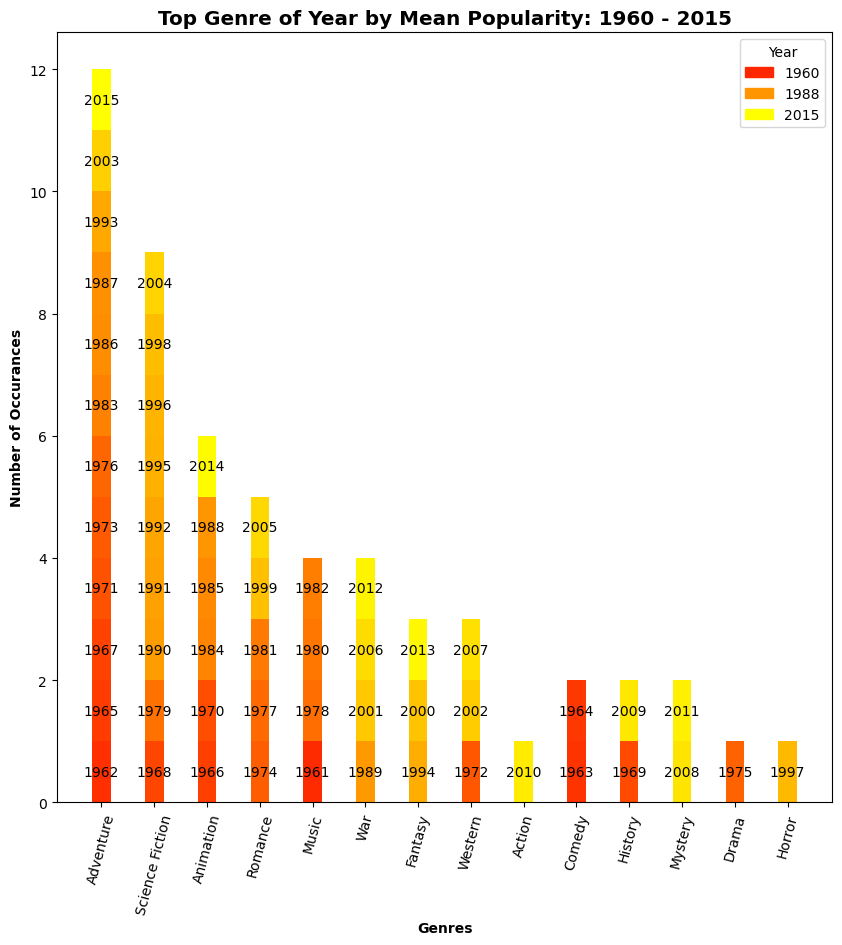

In [51]:
# 1. Get genres in the order of highest frequency to lowest
# 2. For each year in years, do the following:
#       a. For each genre in genres, if genre is present that year, count is 1 else 0
#       b. For each genre in genres, if genre is present that year, label is str(year), else ""
# 3. To get better coloring, we will create a sequence of gradient colors.. one color for
#    each value in years.. we will set the color to color[i] as we iteratively build plot

popular_ordered_genre_list = list(popular_grouped.index.values)
years = popular_genres_of_interest.release_year.sort_values().unique()
cmap = matplotlib.cm.get_cmap("autumn") # copper, Blues
norm = matplotlib.colors.Normalize(vmin=years.min()-10, vmax=years.max())
colors = [cmap(norm(year)) for year in years]

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
i = 0
previous_data = np.zeros(len(popular_ordered_genre_list))
for year in years:
    genres = []
    counts = []
    labels = []

    # Get top genre of year
    query_result = popular_genres_of_interest.query("release_year == @year").reset_index()["main_genre"][0]
    
    # build info for plot row
    for genre in popular_ordered_genre_list:
        genres.append(genre)
        if genre == query_result:
            counts.append(1)
            labels.append(str(year))
        else:
            counts.append(0)
            labels.append(" ")

    # plot
    if i == 0:
        p1 = ax.bar(popular_ordered_genre_list, counts, width=.35, color=colors[i])
        i += 1
    else:
        p1 = ax.bar(popular_ordered_genre_list, counts, width=.35, bottom=previous_data, color=colors[i])
        ax.bar_label(p1, labels=labels, label_type='center')
        previous_data += np.array(counts)
        i+=1

plt.xticks(rotation=75);
plt.xlabel('Genres', weight = 'bold', fontsize = 'medium')
plt.ylabel('Number of Occurances', weight = 'bold', fontsize = 'medium')
plt.title('Top Genre of Year by Mean Popularity: 1960 - 2015', weight = 'bold', fontsize = 'x-large')

yellow_patch = mpatches.Patch(color=cmap(norm(2015)), label='2015')
orange_patch = mpatches.Patch(color=cmap(norm(1988)), label = '1988')
red_patch = mpatches.Patch(color=cmap(norm(1960)), label='1960')
plt.legend(handles = [red_patch, orange_patch, yellow_patch], title='Year');

<a id='conclusion3'></a>
### Conclusion 3:
Adventure movies have consistently been the MOST popular movie genre since 1962, totaling 12 years where it placed top popular genre.
However, you can tell by the smooth red to orange gradient, that most of these occurance were earlier on between 1962 - 1987.

Science fiction is close behind with 9 years at top popular genre. Science fiction isn't a surprise since it was also consistenly a top ROI genre as well.
However, the last time science fiction was a top popular genre was in 2003, some time ago.

In terms of more recent years (the "yellower" bars, but more specifically we'll look at 2008 and on), it looks like people's interests have been all over the place.
- Mystery (twice)
- Adventure (once)
- Animation (once)
- Fantasy (once)
- War (once)
- Action (once)
- History (once)

It would be difficult to recommend a movie genre to produce based on popularity alone. So with that said, my top 3 recommendations would be (in no particular order):
- Science Fiction: it has topped both charts in terms of average ROI and average poparility over the years.
- Mystery: it has been topped both charts in terms of average ROI and average poparility in recent years.
- Adventure: it is a classically popular genre consistently making appearances of the top popularity charts 

### Research Question 4:  What kinds of properties are associated with movies that have high ROIs?

First, it's important to define what a "high" ROI is. For this project, we will define "high" ROI as a movie that doubles it's money, i.e.  an ROI of greater than or equal to 1.
I will start ROIs off at 0, as I would like to discuss the median in my analysis.

Properties to investigate against "high" ROI: budget, director, genre (already explored), release quarter (already explored).

#### Investigating Budget vs. "High" ROI:

<AxesSubplot:>

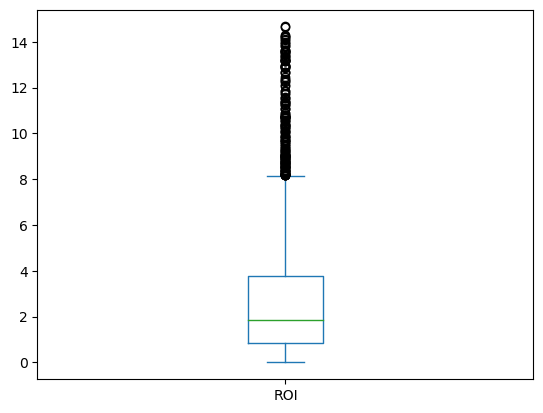

In [52]:
#choosing upper bound on ROI_filter
a = ROI_filter(clean_df, 0, 15)
a['ROI'].plot(kind='box')

In [53]:
# query clean_df for movies with budget  greater than 100000 (looked at lower budgets and there was a lot of variability)
# and use ROI filter to cap ROIs (choosing an upperbound of 10 - slightly into the outlier range)
big_budget = ROI_filter(clean_df.query('budget >= 100000'), 0, 10 )

# setting x and y variables to big_budgets vs ROI
x = np.log10(big_budget['budget'])
y = big_budget['ROI']

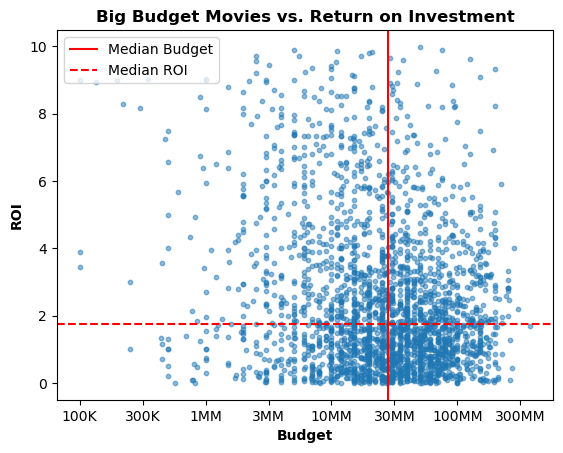

In [54]:
# plotting scatter plot for big_budget vs ROI
plt.xlabel('Budget', weight = 'bold', fontsize = 'medium')
plt.ylabel('ROI', weight = 'bold', fontsize = 'medium')
plt.title('Big Budget Movies vs. Return on Investment', weight='bold', fontsize='large')
plt.scatter(x,y, s=10, alpha=.5);

#including vertical and horizontal lines to represent median budget and median ROI
plt.axvline(x.median(), color = 'red', label = 'Median Budget')
plt.axhline(y.median(), color='red',linestyle = 'dashed', label='Median ROI')
plt.legend(loc='upper left')

#reseting xticks so that are not base 10
plt.xticks([5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5],['100K', '300K', '1MM', '3MM', '10MM', '30MM', '100MM', '300MM']);

Alternatively, we can use a density plot to further analyze big budget vs ROI.

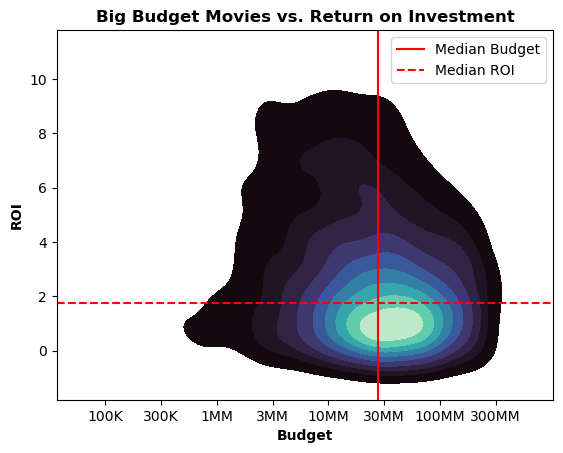

In [55]:
# making df with just the budgets and ROIs from big_budget df
kde_data = pd.DataFrame({"budget": x, "roi": y})

# making density plot to better visualize the scatterplot
sns.kdeplot(data=kde_data, x="budget", y="roi", fill=True, cmap="mako");
plt.xlabel('Budget', weight = 'bold', fontsize = 'medium')
plt.ylabel('ROI', weight = 'bold', fontsize = 'medium')
plt.title('Big Budget Movies vs. Return on Investment', weight='bold', fontsize='large')

# plotting median budget and median ROI
plt.axvline(x.median(), color = 'red', label = 'Median Budget')
plt.axhline(y.median(), color='red',linestyle = 'dashed', label='Median ROI')
plt.legend()

#reseting xticks so that are not base 10
plt.xticks([5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5],['100K', '300K', '1MM', '3MM', '10MM', '30MM', '100MM', '300MM']);

This density estimate plot gives us a much clearer idea of where the data is concentrated.

<a id='conclusion4_budget'></a>
### Conclusion 4 (Budget):

It doesn't seem as though having a certain budget, high or low, will "result" in a high ROI. The highest ROIs are few and are scattered amoungst various budgets.

The only insight I think there can be taken from this is that movies with a budget between 20 mill to 100mm, are likely to produce a movie with with an ROI above 0 but less than 2x profit.


### Investigating Director vs. "High" ROI

In [56]:
# looking into the top 5 ROI movies without an "infinite" ROI
non_inf_roi = ~np.isinf(clean_df.ROI)
clean_df[non_inf_roi][["budget", 'ROI', "original_title"]].sort_values(by="ROI", ascending=False).head(5)

,budget,ROI,original_title
10495,113,1.018618e+06,"The Karate Kid, Part II"
6179,114,5.877093e+04,Into the Night
3608,93,2.688072e+04,From Prada to Nada
7447,15000,1.288939e+04,Paranormal Activity
2449,25000,9.919000e+03,The Blair Witch Project


Clearly there are errors in the budget data. For example, 'The Karate Kid, Part II"  had a budget of $130 million not $113.
However, there is no way to simple pattern to address these errors, so we'll use records that have a budget of at least $10,000.

In [57]:
high_ROI_budget_filter = ROI_filter(clean_df.query('budget >= 10000'), 1, 10)

In [58]:
# aggregating high_ROI_budget_filter 
aggregations = {'ROI': ["mean", min, max],
                "budget":["mean", min, max],
                "original_title": "count"}
# grouping data by director
# aggregating over the ROIs, budgets, and original titles for each director
# dropping one-hit wonder directors
top_directors = high_ROI_budget_filter.groupby('director').aggregate(aggregations).sort_values(by=("original_title","count"), ascending=False).query("`('original_title', 'count')` > 1")
top_directors

ROI                            budget  \
                              mean       min       max          mean   
director                                                               
Steven Spielberg          3.530711  1.055556  8.878579  7.100000e+07   
Clint Eastwood            3.904079  1.037233  8.222915  3.025000e+07   
Tim Burton                2.623307  1.060715  5.823444  7.000000e+07   
Woody Allen               5.479087  1.490099  8.562856  1.130909e+07   
Ron Howard                3.260581  1.031581  7.727667  7.710000e+07   
...                            ...       ...       ...           ...   
Tony Gilroy               1.923579  1.127484  2.719673  7.750000e+07   
Barbra Streisand          1.513127  1.492920  1.533333  2.100000e+07   
Eric Darnell|Tom McGrath  4.564206  3.026002  6.102409  1.125000e+08   
Michael Anderson          1.615377  1.452976  1.777778  7.500000e+06   
Arthur Penn               2.551985  1.103970  4.000000  7.750000e+06   

                                              original_title  
                               min        max          count  
director                                                      
Steven Spielberg           3000000  185000000             18  
Clint Eastwood             3700000   60000000             16  
Tim Burton                 6000000  200000000             11  
Woody Allen                2000000   30000000             11  
Ron Howard                 8000000  150000000             10  
...                            ...        ...            ...  
Tony Gilroy               25000000  130000000              2  
Barbra Streisand          12000000   30000000              2  
Eric Darnell|Tom McGrath  75000000  150000000              2  
Michael Anderson           6000000    9000000              2  
Arthur Penn                 500000   15000000              2  

[353 rows x 7 columns]

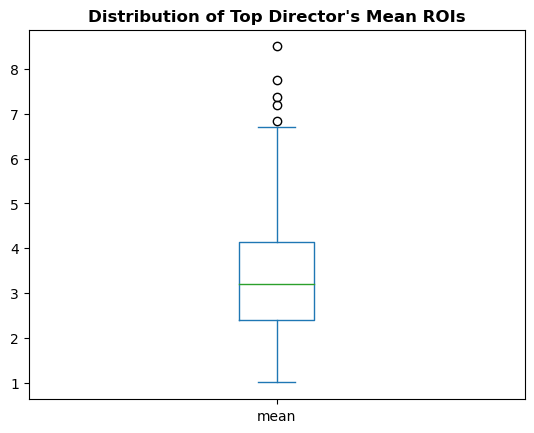

In [59]:
# plotting box plot of top-director's mean ROIs
top_directors['ROI']['mean'].plot.box()
plt.title("Distribution of Top Director's Mean ROIs", weight='bold');



Text(0, 0.5, 'Number of Top Directors')

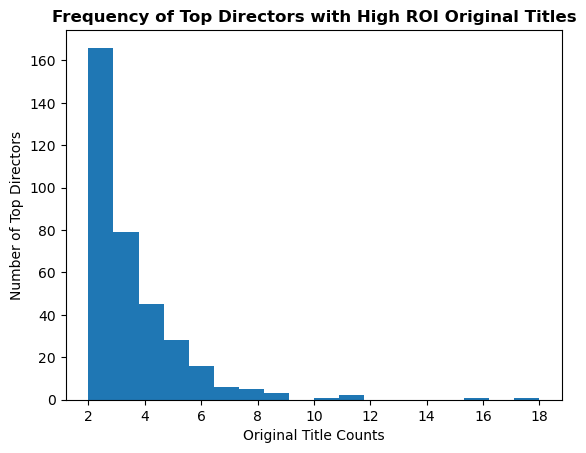

In [60]:
# plotting box plot of top-director's original_title counts
top_directors['original_title']['count'].plot.hist(bins=18);
plt.title("Frequency of Top Directors with High ROI Original Titles", weight='bold')
plt.xlabel('Original Title Counts')
plt.ylabel('Number of Top Directors')

In [61]:
# investigating the outlier directors
top_directors.sort_values(by=('ROI', 'mean'), ascending=False).head(5)

ROI                          budget            \
                             mean       min       max        mean       min   
director                                                                      
Herbert Ross             8.505077  8.249740  8.760415  10100000.0   8200000   
Geoffrey Sax             7.759821  7.400000  8.119642   7500000.0   5000000   
Jeff Tremaine            7.369175  5.616247  9.122102  13000000.0  11000000   
Peter Yates              7.193360  6.691068  7.695652   3900000.0   2300000   
Rawson Marshall Thurber  6.841627  6.297138  7.386115  28500000.0  20000000   

                                  original_title  
                              max          count  
director                                          
Herbert Ross             12000000              2  
Geoffrey Sax             10000000              2  
Jeff Tremaine            15000000              2  
Peter Yates               5500000              2  
Rawson Marshall Thurber  37000000              2

Turns out these top directors with outlier mean ROIs don't have too many high ROI movies (2 each). However, these movies they directed had such high ROIs that it brought them above the rest of the top directors in terms of mean ROI.

In [62]:
# verifying budgets for movies directed by top 5 mean ROI directors are accurate
#   checked each budget with Google

high_ROI_budget_filter[high_ROI_budget_filter['director'] == 'Herbert Ross'];
high_ROI_budget_filter[high_ROI_budget_filter['director'] == 'Geoffrey Sax'];
high_ROI_budget_filter[high_ROI_budget_filter['director'] == 'Jeff Tremaine']; #min budget movie is off by .5 million (should be 11.5 mill not 11 mill)
high_ROI_budget_filter[high_ROI_budget_filter['director'] == 'Peter Yates'];
high_ROI_budget_filter[high_ROI_budget_filter['director'] == 'Rawson Marshall Thurber'];



<a id='conclusion4_director'></a>
### Conclusion 4 (directors):
Note: any movies discussed below are specifically high ROI movies, i.e. movies with an ROI of 1 to 10.

50% of directors with high ROI & high budget movies have an average ROI of ~2.5x to 4x associated with them.
What's interesting is that many of these directors have only directed between 2-4 high ROI movies.

In fact the top 5 directors with the highest mean ROIs only directed 2 high ROI movies:
- Herbert Ross
- Geoffrey Sax
- Jeff Tremaine
- Peter Yates
- Rawson Marshall Therber

At the other end of the specturm, the top 5 directors with highest frequency of high ROI movies had much lower average ROIs (ranging from mid 2s to mid 5s):
- Steven Spielberg:	3.530711 (18 high ROI movies)
- Clint Eastwood: 3.904079 (16 high ROI movies)
- Tim Burton: 2.623307 (11 high ROI movies)
- Woody Allen: 5.479087 (11 high ROI movies)
- Ron Howard: 3.260581 (10 high ROI movies)

Based on the director's High ROI movies only, Woody Allen has the best track record for greatest number of high ROI movies & with highest ROI average.
At the end of the day however, any of the 353 directors, with more than 1 high ROI movie, probably know what a high ROI movie looks like and how to direct a movie to "hopefully" improve whatever ROI a script may be predisposed to.

<a id='final_thoughts'></a>
## Final Thoughts

Limits to Explorations:
    - Would be nice to have more current data (2015 - 2022)
    - There is wrong data that don't have patterns or can't easily be verified and removed. 
        - Wrong Budgets 
        - Budgets of 0 (could actually be 0 or budget is missing)

Further Questions/Explorations:
- How have changes in the entertainment industry affected ROIs? Not something that can be analyzed with this dataset.
- Could do analysis on movies with negative ROIs, moderate to high ROIs, and extraordinarily high ROIs.
- Why do popular movies not necessarily profit well? There are some limitations in data to fully analyze this.
- Could Look into relationships between all variables investigated: release quarter, top popular genres, top ROI genres, top ROI directors, and top ROI budgets.
- Could look into directors with high ROI movies: how their mean ROI on high ROI movies compare to their entire history of movies.